<a href="https://colab.research.google.com/github/karol10542/MyRepo/blob/main/zad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
def square():
  x1=random.random()
  x2=random.random()
  if(0.05<(x1-0.75)*(x1-0.25))+(x2-0.75)*(x2-0.25)<0.05:
    return np.array([x1,x2,1])
  else:
    return np.array([x1,x2,0])

In [3]:
probka=np.array([square() for i in range(3000)])
print(probka.shape)

(3000, 3)


In [4]:
def draw_result(X,y): 
  fig=plt.figure(figsize=(5,5))

  

  plt.title("Działanie na próbce testowej",fontsize=16) 
  plt.xlim(min(X[:,0]),max(X[:,0]))
  plt.ylim(min(X[:,1]),max(X[:,1]))
  plt.scatter(X[:,0],X[:,1],c=y,
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=min(y), vmax=max(y)))

  plt.xlabel('$x_1$',fontsize=18)
  plt.ylabel('$x_2$',fontsize=18);

Shapes of datasets X_train, X_test, y_train, y_test:  (1500, 2) (1500, 2) (1500,) (1500,)


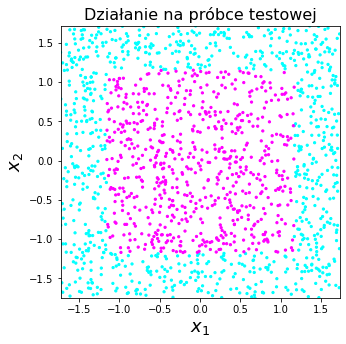

In [5]:
X, y = probka[:,:2], probka[:,2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

print("Shapes of datasets X_train, X_test, y_train, y_test: ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#narysuj dane testowe
draw_result(X_test, y_test)

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(5,5), activation='tanh', alpha=0.1, 
                    learning_rate_init=0.01, early_stopping=True,validation_fraction=0.2,verbose=True,n_iter_no_change=100,max_iter=1000)
                    #max_iter=1000) 


print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = 0.72876649
Validation score: 0.566667
Iteration 2, loss = 0.69390009
Validation score: 0.603333
Iteration 3, loss = 0.67882822
Validation score: 0.670000
Iteration 4, loss = 0.67027306
Validation score: 0.730000
Iteration 5, loss = 0.65986904
Validation score: 0.770000
Iteration 6, loss = 0.64825184
Validation score: 0.826667
Iteration 7, loss = 0.63561751
Validation score: 0.823333
Iteration 8, loss = 0.62136620
Validation score: 0.826667
Iteration 9, loss = 0.60296996
Validation score: 0.823333
Iteration 10, loss = 0.58292029
Validation score: 0.823333
Iteration 11, loss = 0.55993236
Validation score: 0.833333
Iteration 12, loss = 0.53316334
Validation score: 0.833333
Iteration 13, loss = 0.50319512
Validation score: 0.853333
Iteration 14, loss = 0.47120862
Validation score: 0.873333
Iteration 15, loss = 0.43804675
Validation score: 0.896667
Iteration 16, loss = 0.40535179
Validation score: 0.923333
Iteration 17, loss = 0.37627316
Validation score: 0.923333
Iterat

[0.5666666666666667, 0.6033333333333334, 0.67, 0.73, 0.77, 0.8266666666666667, 0.8233333333333334, 0.8266666666666667, 0.8233333333333334, 0.8233333333333334, 0.8333333333333334, 0.8333333333333334, 0.8533333333333334, 0.8733333333333333, 0.8966666666666666, 0.9233333333333333, 0.9233333333333333, 0.9333333333333333, 0.9433333333333334, 0.94, 0.9466666666666667, 0.9566666666666667, 0.94, 0.96, 0.9566666666666667, 0.9566666666666667, 0.96, 0.96, 0.9633333333333334, 0.96, 0.9633333333333334, 0.97, 0.9633333333333334, 0.9666666666666667, 0.97, 0.9666666666666667, 0.96, 0.9666666666666667, 0.97, 0.9733333333333334, 0.9633333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.97, 0.97, 0.9733333333333334, 0.97, 0.97, 0.9733333333333334, 0.97, 0.97, 0.97, 0.9766666666666667, 0.9766666666666667, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9666666666666667, 0.97333333333

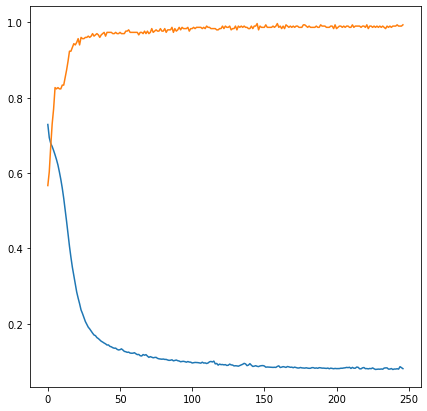

In [7]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

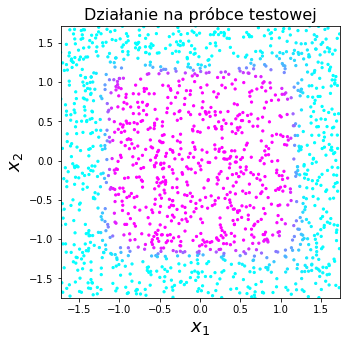

In [8]:
draw_result(X_test, Z)